# Rodrigo Burberg Project 4 - Credit Card Users Churn Prediction

Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

Objective

Explore and visualize the dataset. 
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

 

Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 Submission Guidelines :

The submission should be: well commented Jupyter notebook [format - .HTML and .ipynb]
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
Happy Learning!!

In [4]:

# Import Libraries 



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression


In [5]:
#Load Data 

Bank = pd.read_csv("BankChurners.csv", na_values= 'Unknown')


Bank.head(10) 


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [6]:
Bank.shape

(10127, 21)

In [7]:
Bank.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
Bank.nunique()

#unique values of features

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 5
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [9]:
# Checks to see if there are any null values 

Bank.isnull().values.any()

True

Education_Level, Marital_Status, Income_Category have unkown values we will impute them using KNN later on 

## The most important variable is Attrition_Flag, since this will let us if a customer left or stayed

 ## EDA & Data Pre-Processing 

In [11]:

# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [12]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

In [13]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, Bank["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, Bank["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

In [14]:
# we will Drop CLIENTNUM since this does not add any value to the models

Bank = Bank.drop('CLIENTNUM', axis =1 )

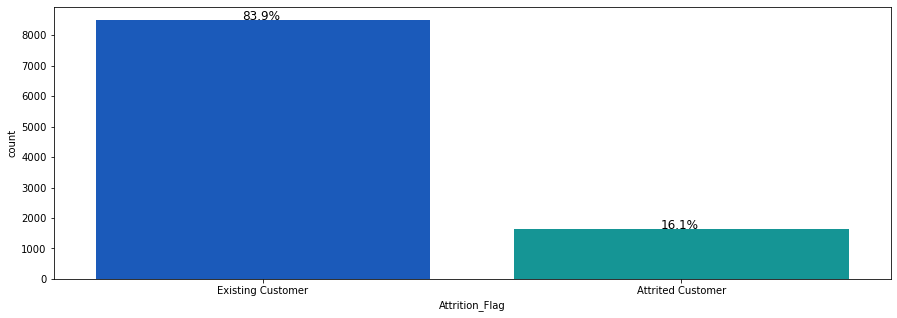

In [15]:
# Attrition_Flag will change to 0 for Exsisting Customer and 1 for Attrition Customer since we want to predict which customer leave 

#Bank['Attrition_Flag'] = Bank['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1 })

#Attrition_Flag Observations:


# Existing Customer - 83.9% - have not cancelled credit cards 
# Attrition Customer - 16.1% -cancelled credit cards

plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Attrition_Flag"],palette='winter')
perc_on_bar(ax,Bank["Attrition_Flag"])

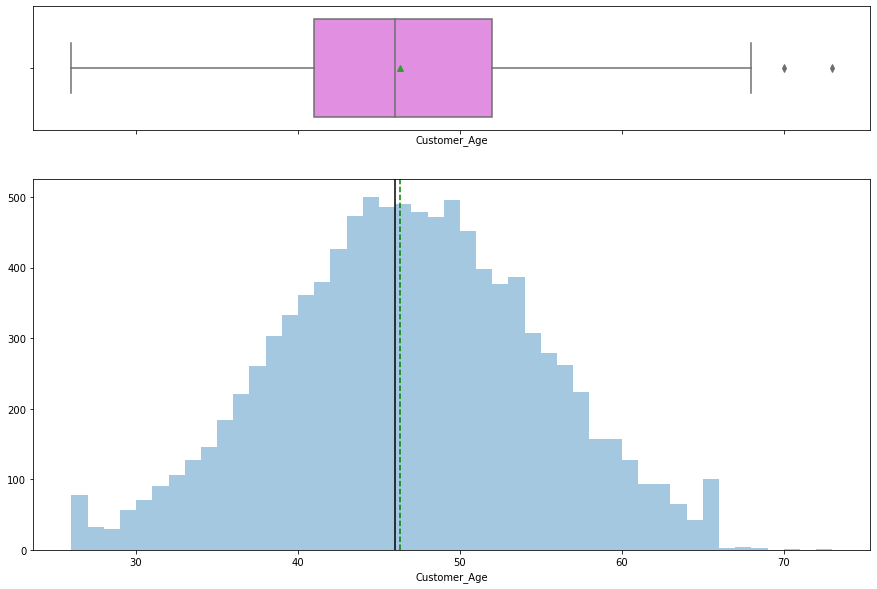

In [16]:
#AGE OBSERVATIONS

# No Null values of 'Customer_Age' 

# Mean and Median values are very close around 46

# Fairly symtric data having a few more customers in the endpoints of the histogram 

# Min Customer_Age is 26 which is a point for further analysis;

# Might be a good idea to target potential customer under 26 

# NO NEED TO CHANGE DATA 

histogram_boxplot(Bank['Customer_Age'])

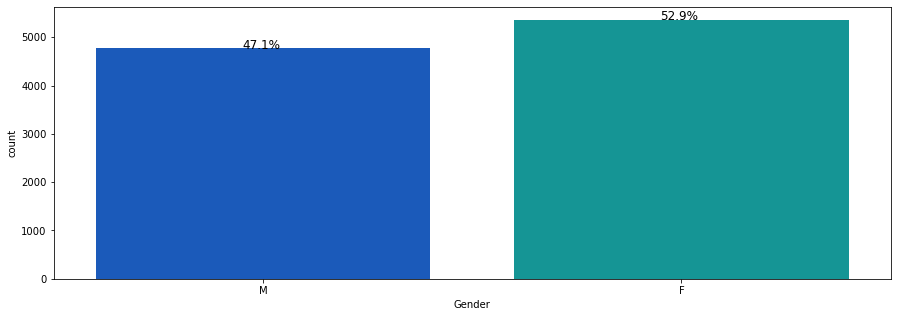

In [17]:
#Gender Observations:

# Univariate Analysis

# F - 52.9% 
# M - 47.1%

plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Gender"],palette='winter')
perc_on_bar(ax,Bank["Gender"])

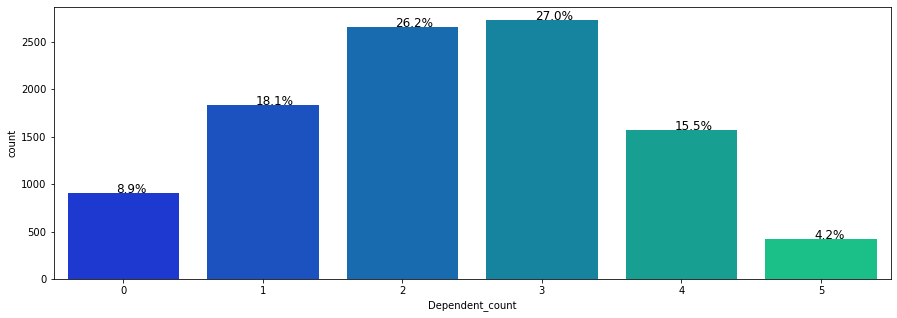

In [18]:
# Dependent_count Observations 

# Most customers have dependents; only 8.9% of customers do not have dependents 

# No need to make any changes  

plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Dependent_count"],palette='winter')
perc_on_bar(ax,Bank["Dependent_count"])

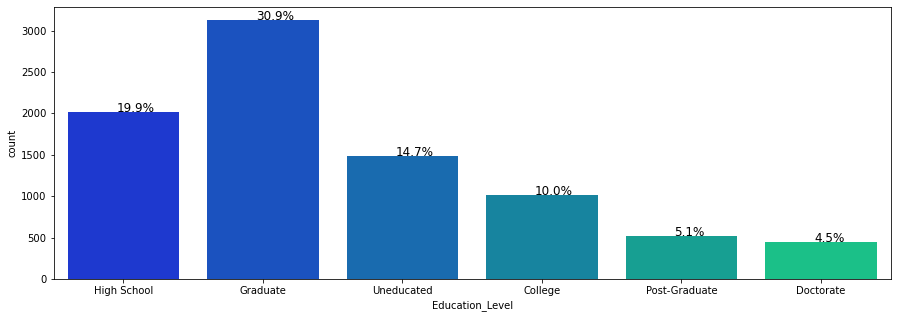

In [19]:
# Education_Level Observations 


##COME BACK AND TREAT UNKOWN 

plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Education_Level"],palette='winter')
perc_on_bar(ax,Bank["Education_Level"])

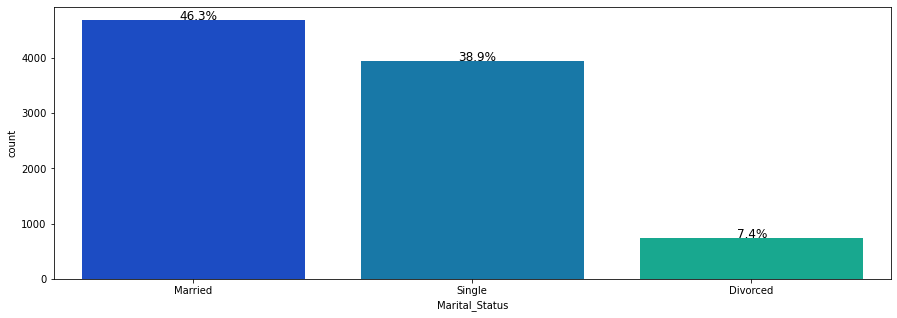

In [20]:
#Marital_Status Observations 


##COME BACK AND TREAT UNKOWN 

#Married 46.3%
#Single 38.9%
#Unkown - 7.4%
#Divorced - 7.4%

plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Marital_Status"],palette='winter')
perc_on_bar(ax,Bank["Marital_Status"])


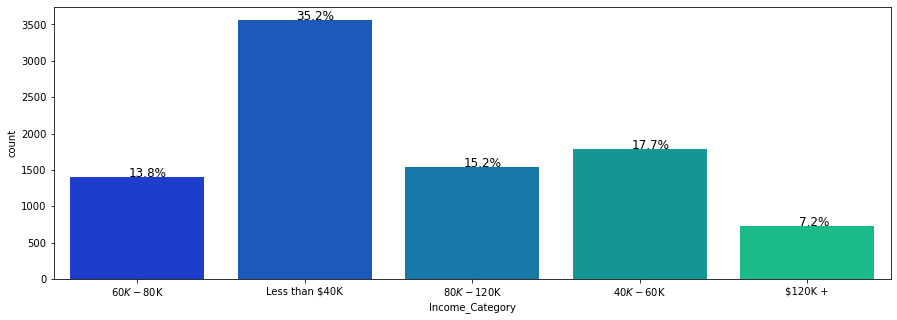

In [21]:
#Income_Category Observations 

plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Income_Category"],palette='winter')
perc_on_bar(ax,Bank["Income_Category"])

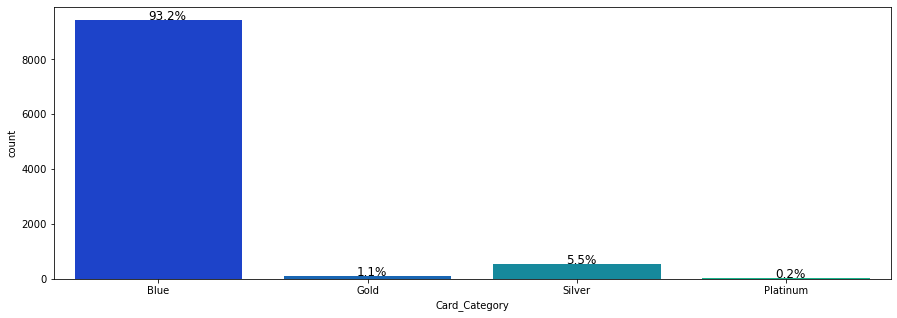

In [22]:
#Card_Category Observations

#Blue 93.2 %
#Gold 1.1%
#silver 5.5%
#Platinum 0.2%


plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Card_Category"],palette='winter')
perc_on_bar(ax,Bank["Card_Category"])


- Blue 93.2 %
- Gold 1.1%
- Silver 5.5%
- Platinum 0.2%



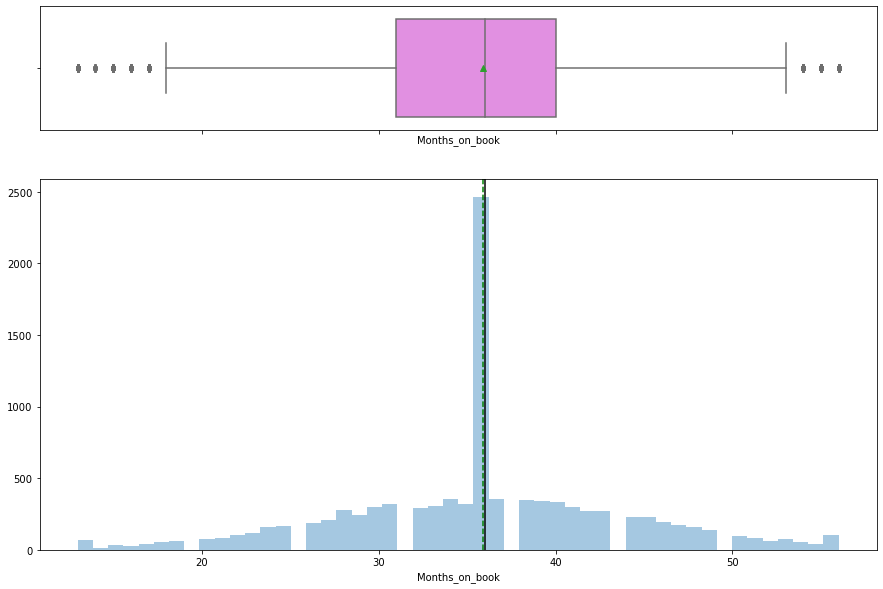

In [23]:
#Months_on_book  

histogram_boxplot(Bank['Months_on_book'])

Months_on_book Observations

- wide distribution symetric distribution with a heavy concention the mode; this might mean a bunch of customers signed up at same, such as a sign-up offer, etc. 

- Mode and mean lie very close to each other in the peak of the data ~ 36 months 

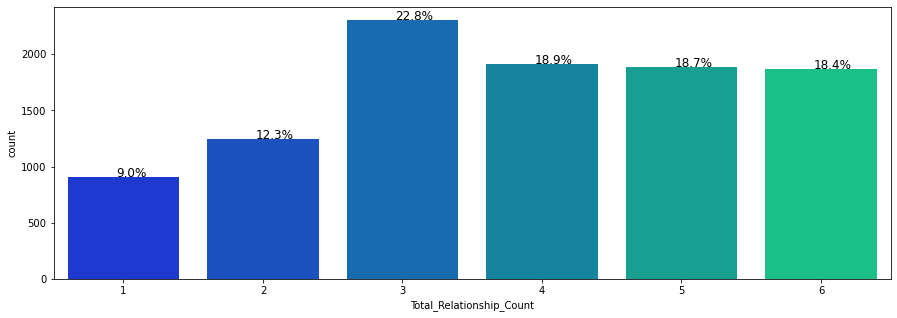

In [24]:
#Total_Relationship_Count

plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Total_Relationship_Count"],palette='winter')
perc_on_bar(ax,Bank["Total_Relationship_Count"])

most customers have more than one product; only 9.0% had one product 


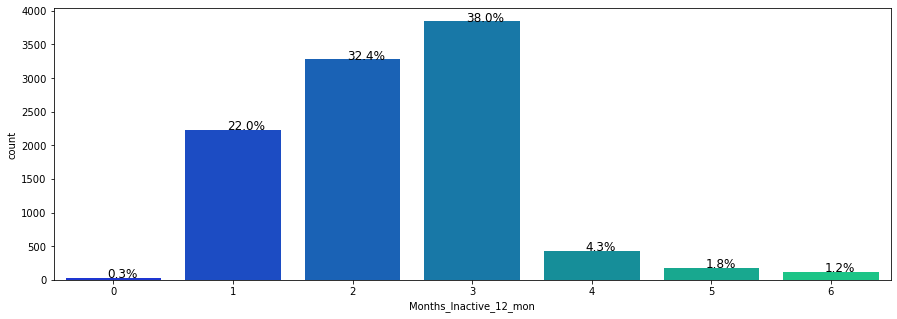

In [25]:
#Months_Inactive_12_mon 



plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Months_Inactive_12_mon"],palette='winter')
perc_on_bar(ax,Bank["Months_Inactive_12_mon"])

- Most clients have 1-3 months in of Inactive 12 months 

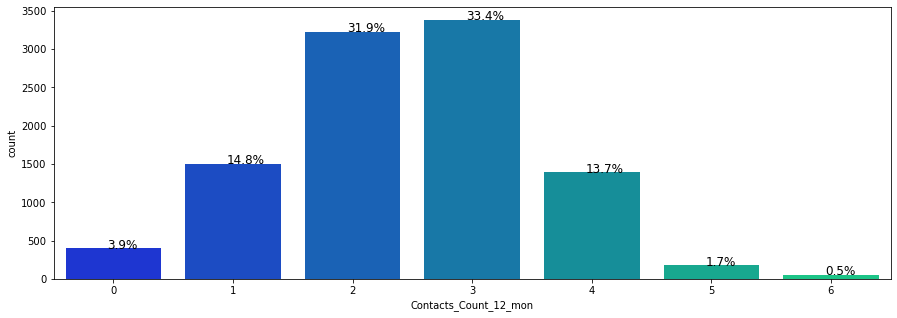

In [26]:
#Contacts_Count_12_mon




plt.figure(figsize=(15,5))
ax = sns.countplot(Bank["Contacts_Count_12_mon"],palette='winter')
perc_on_bar(ax,Bank["Contacts_Count_12_mon"])


- 0 - 3.9%
- 1 - 14.8%
- 2 - 31.9%
- 3 - 33.4%
- 4 - 13.7%
- 5 - 1.7%
- 6 - 0.6%

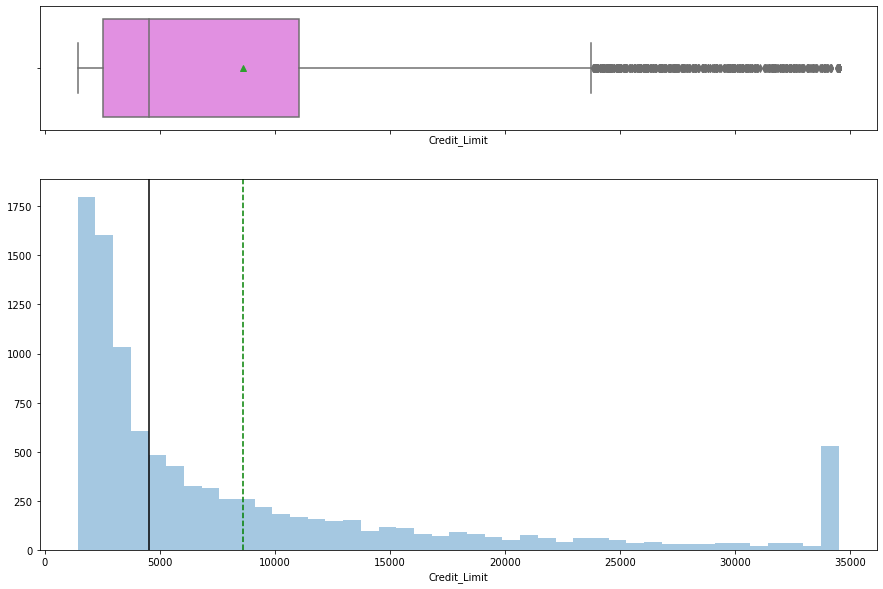

In [27]:
#Credit_Limit

histogram_boxplot(Bank['Credit_Limit'])


Positively skewed data, most customers have a fairly low credit limit less than 5K. 

Will not drop any of the outliers since, the outliers seem to be following the natural tendency of the data. 

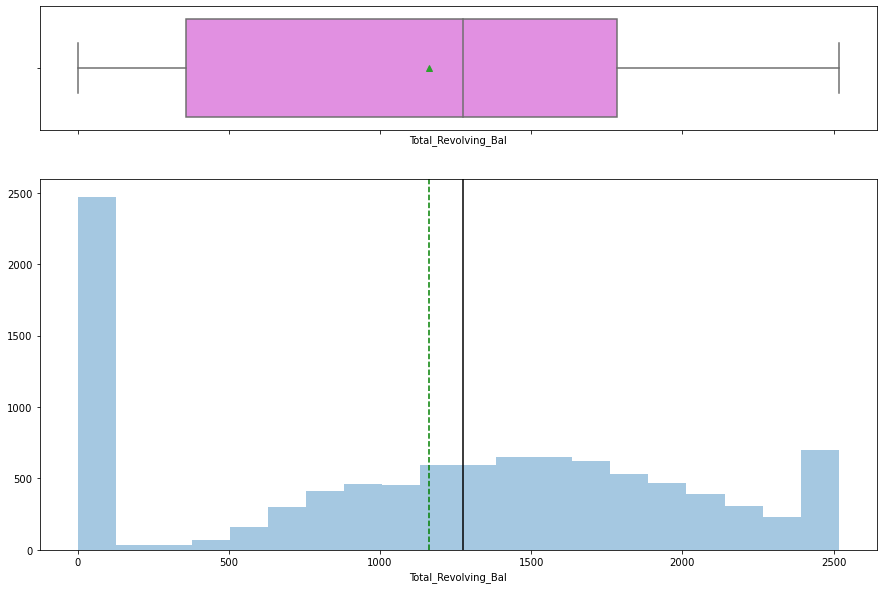

In [28]:
#Total_Revolving_Bal

histogram_boxplot(Bank['Total_Revolving_Bal'])



There are a large number of customers with a total revolving balance of 0.

Normal distribution not considering customers with balance of 2500 and 0. 

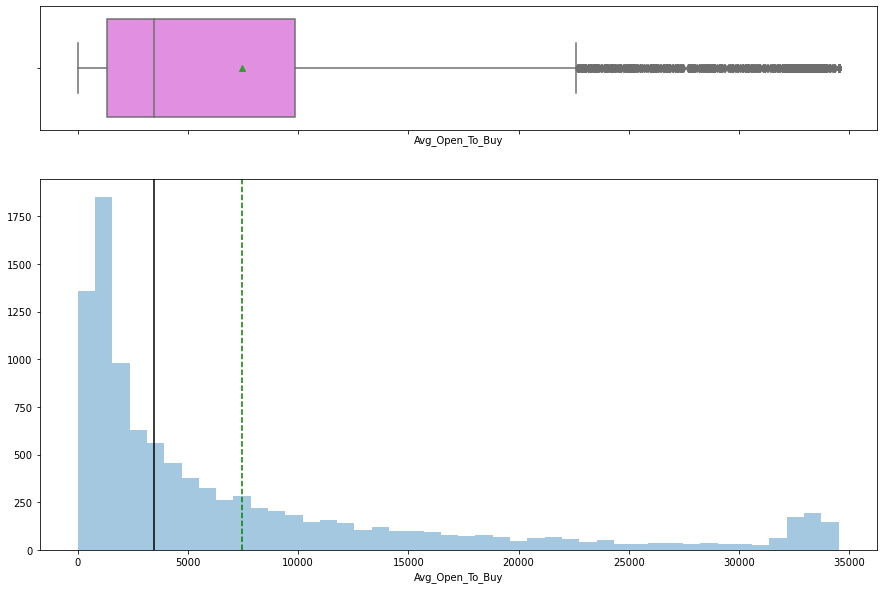

In [29]:
#Avg_Open_To_Buy

histogram_boxplot(Bank['Avg_Open_To_Buy'])



This data seems to follow the Credit_Limit trend. 

Positively skewed, top 75% have high Avg_Open_To_Buy


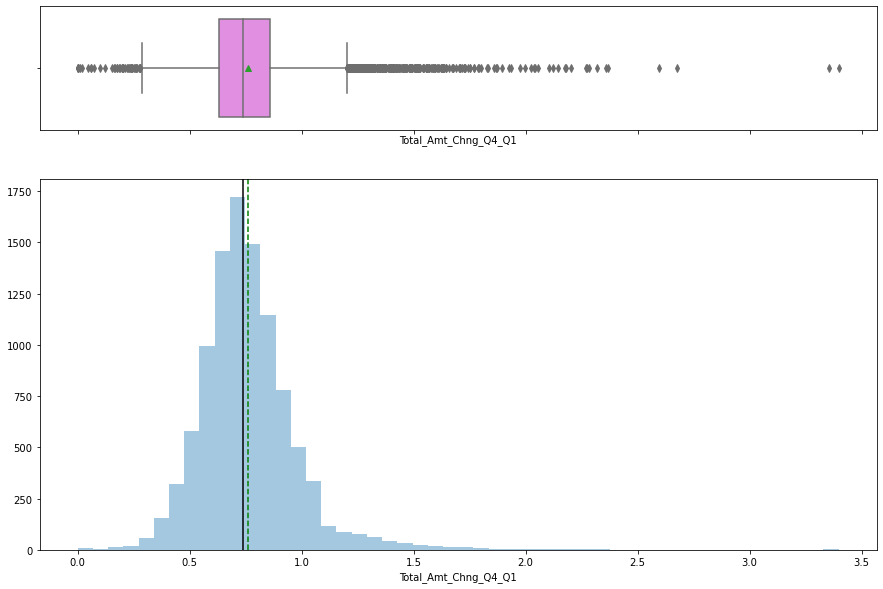

In [30]:
#Total_Amt_Chng_Q4_Q1

histogram_boxplot(Bank['Total_Amt_Chng_Q4_Q1'])



Normal distribution of data. 

Mean and Mode lying close ~ .75


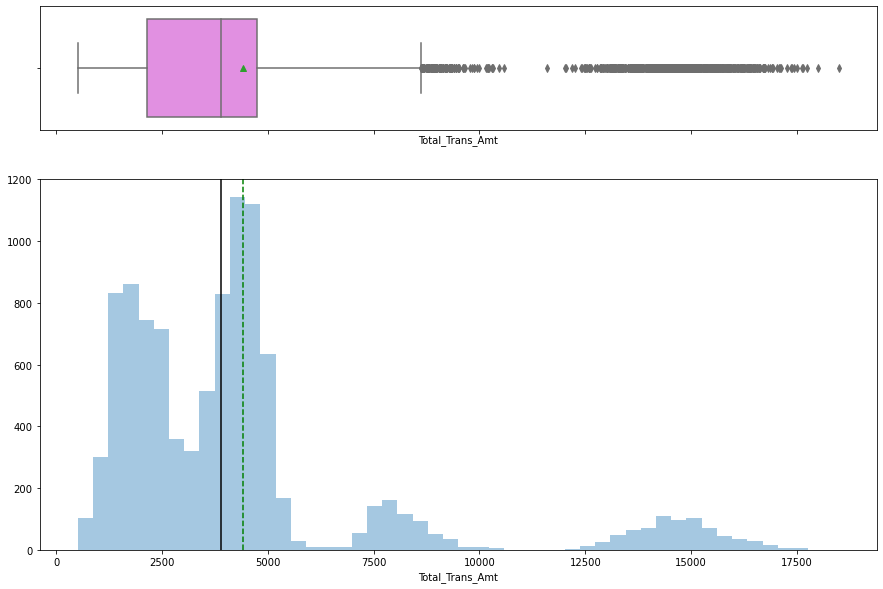

In [31]:
#Total_Trans_Amt

histogram_boxplot(Bank['Total_Trans_Amt'])



Positively skewed data with 4 peaks. 


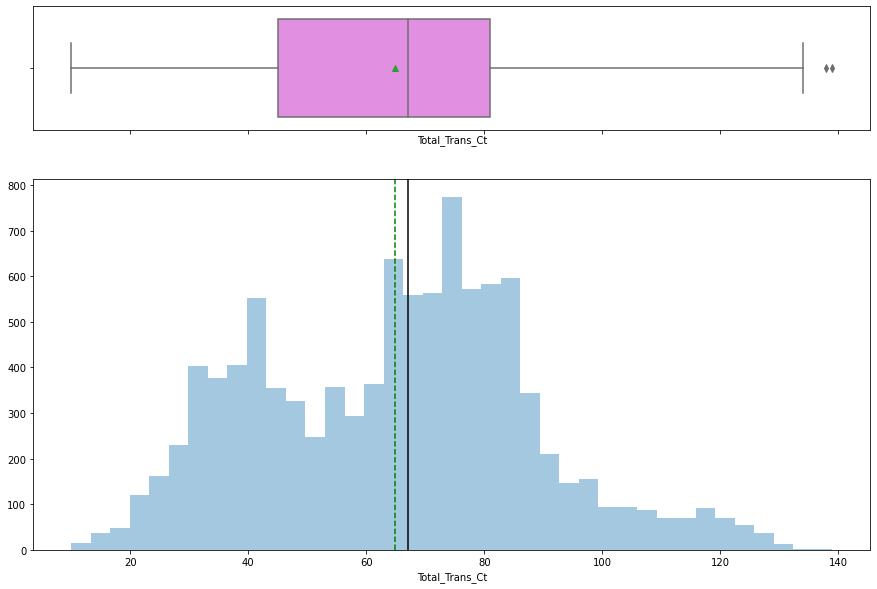

In [32]:
#Total_Trans_Ct

histogram_boxplot(Bank['Total_Trans_Ct'])


Negatively skewed, with 2 peaks; Bimodal shape

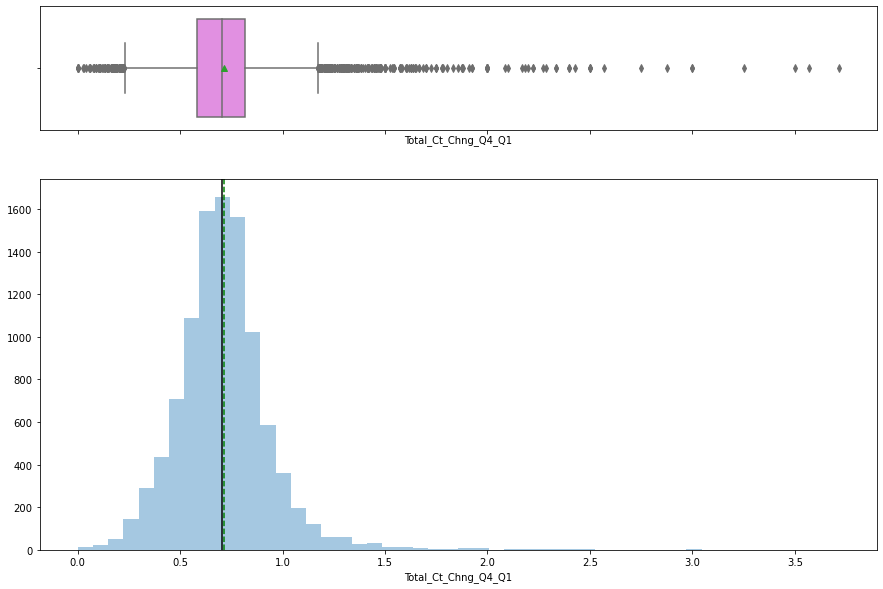

In [33]:
#Total_Ct_Chng_Q4_Q1

histogram_boxplot(Bank['Total_Ct_Chng_Q4_Q1'])


Normal distribution with mean and mode in the same place 

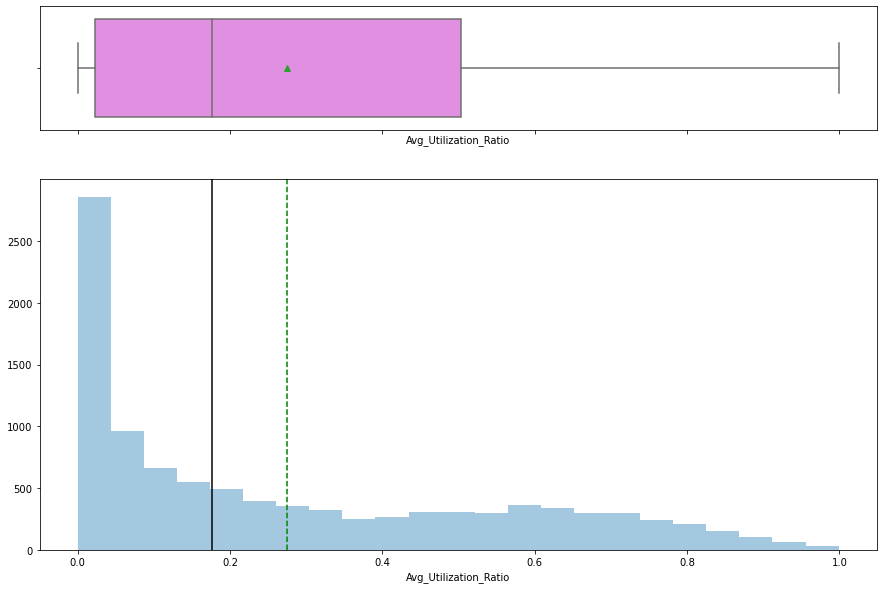

In [34]:
#Avg_Utilization_Ratio

histogram_boxplot(Bank['Avg_Utilization_Ratio'])

Positively skewed, high numbers of customers are not using their credit cards 

Large Number of customers have 0 Avg_Utilization_Ratio. This is normal so will not treat data. 


## Bivariate Analysis

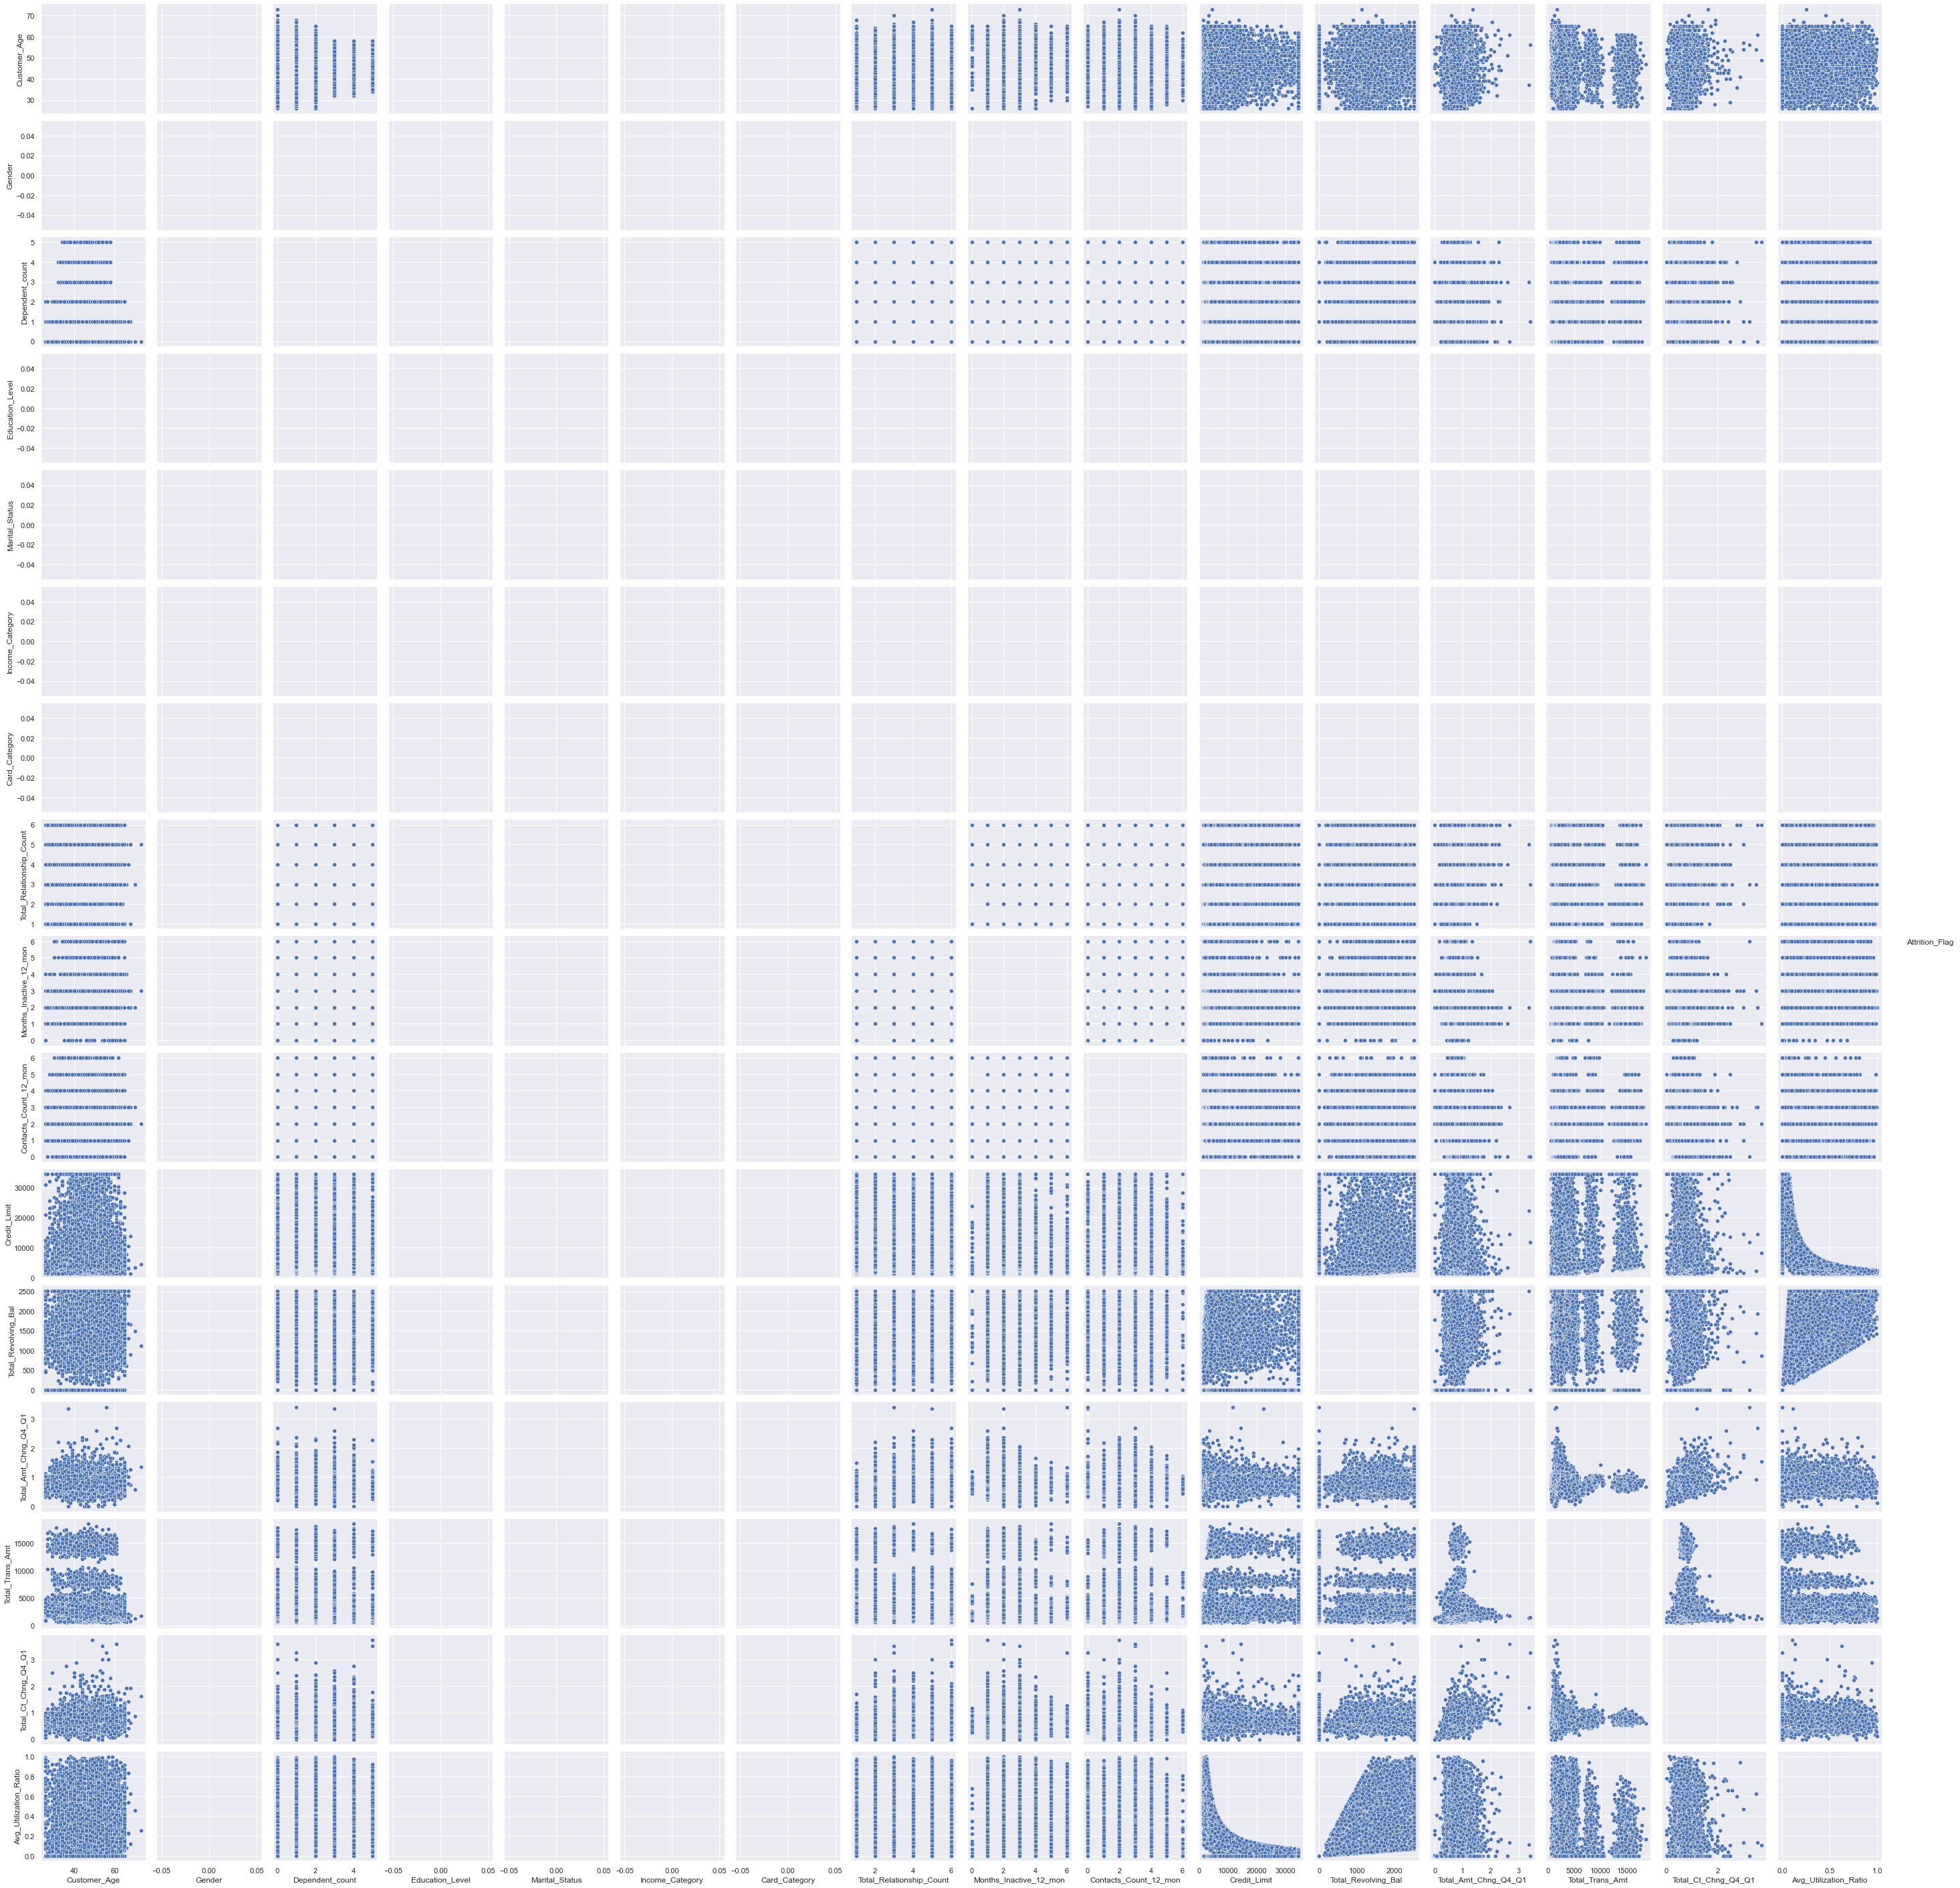

In [118]:
sns.pairplot(Bank, hue="Attrition_Flag")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

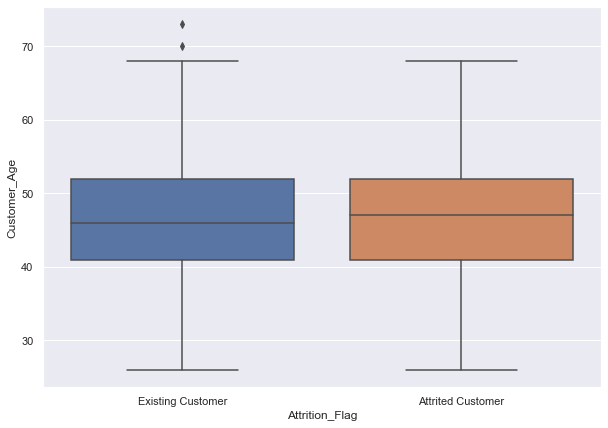

In [36]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=Bank, orient="vertical")

- No significant difference in age of exsisting customers vs attrited customers

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


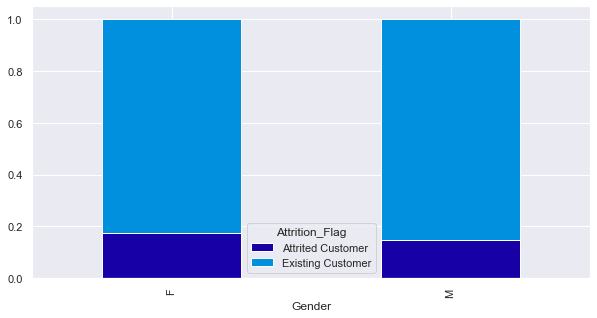

In [38]:
stacked_plot(Bank["Gender"])

- Males and Females attrite at the same levels 

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Dependent_count'>

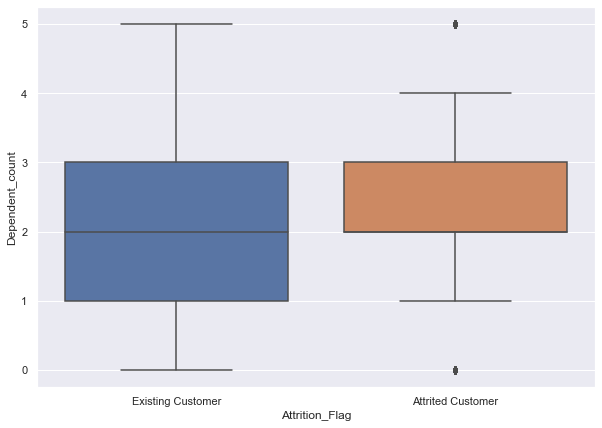

In [40]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Dependent_count", data=Bank, orient="vertical")

Inner 50th percentile of attited customers have 2-3 dependents 

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
College                        154                859  1013
Doctorate                       95                356   451
Graduate                       487               2641  3128
High School                    306               1707  2013
Post-Graduate                   92                424   516
Uneducated                     237               1250  1487
All                           1371               7237  8608
------------------------------------------------------------------------------------------------------------------------


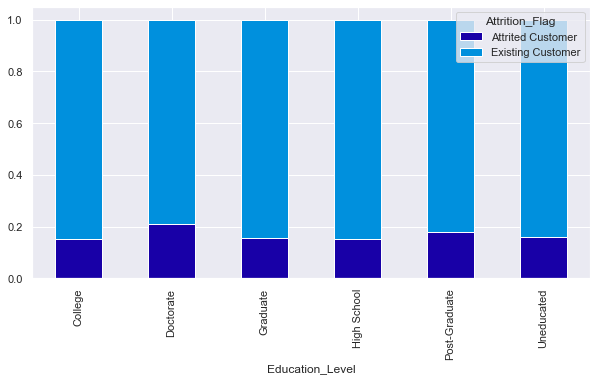

In [41]:
stacked_plot(Bank["Education_Level"])

- Attrition levels fairly the same among educational levels, docorate has slightly higher level.

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
Divorced                      121                627   748
Married                       709               3978  4687
Single                        668               3275  3943
All                          1498               7880  9378
------------------------------------------------------------------------------------------------------------------------


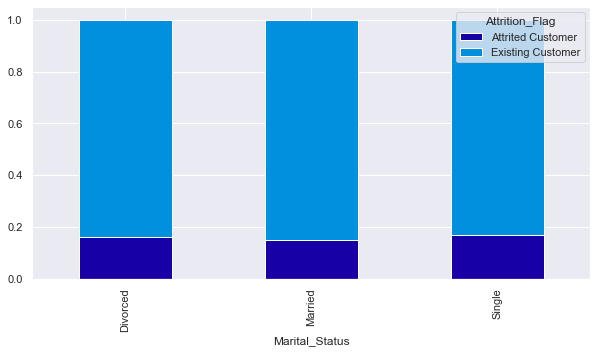

In [42]:
stacked_plot(Bank["Marital_Status"])

- Attrition Levels the same among all martial status 

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
$120K +                        126                601   727
$40K - $60K                    271               1519  1790
$60K - $80K                    189               1213  1402
$80K - $120K                   242               1293  1535
Less than $40K                 612               2949  3561
All                           1440               7575  9015
------------------------------------------------------------------------------------------------------------------------


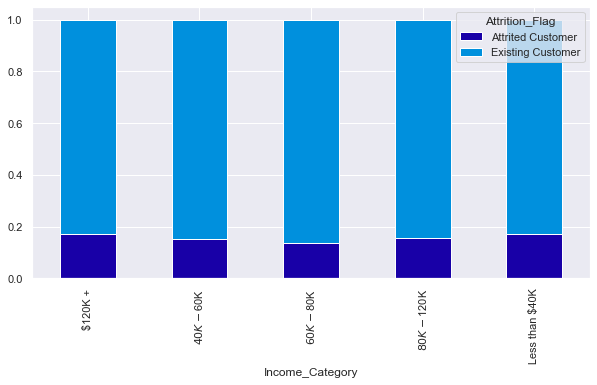

In [44]:
stacked_plot(Bank["Income_Category"])

- Income categories do not seem to make a difference in determining if a customer will leave 

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


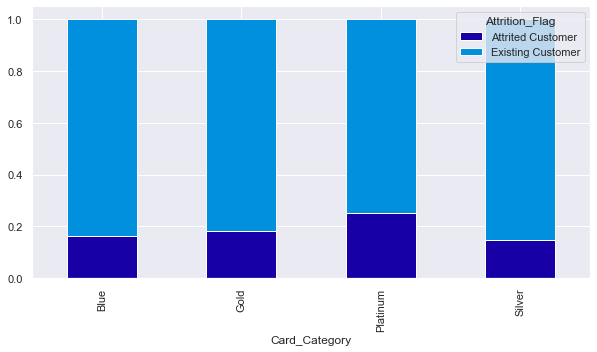

In [45]:
stacked_plot(Bank["Card_Category"])

- Platimnum card holders attrite at a higher rate than the rest, then Gold, Blue, and Silver. 

- We have a higher blue credit cards than the rest. 

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_on_book'>

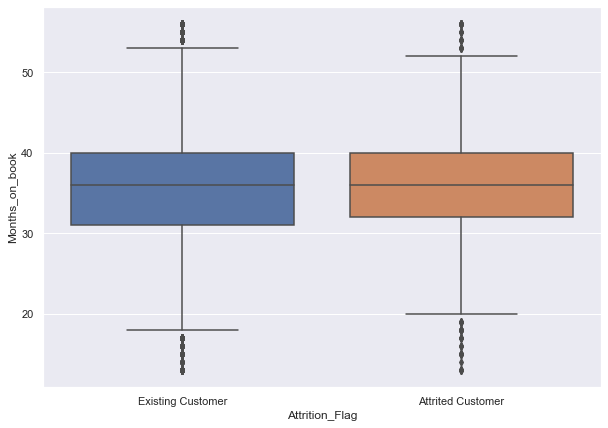

In [46]:
#stacked_plot(Bank["Months_on_book"])

sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Months_on_book", data=Bank, orient="vertical")

- Almost identical in exsisting and attritied customers

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

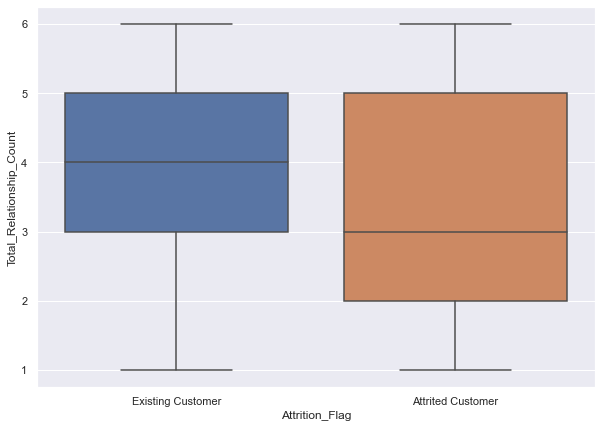

In [47]:
#Total_Relationship_Count

sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count", data=Bank, orient="vertical")

- Same rage for 75th percentile, but 50th percent range in attrited customers include 2, so the bank should worry more about customers with 2 or 3 accounts since the inner 25 percent come from this range.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

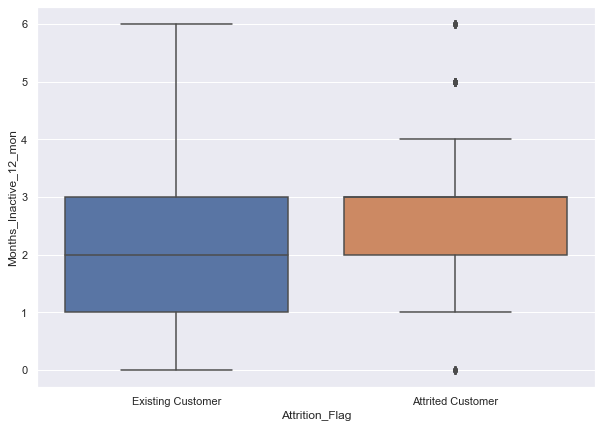

In [49]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon", data=Bank, orient="vertical")

- 75th percentile range of attrited customers lie in months 1 - 4, while the 50th percentile lies in months 2-3. 

- This could be considered the danger zone and bank could focus on these customers during these months, giving them incentives to stay, ect. 

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


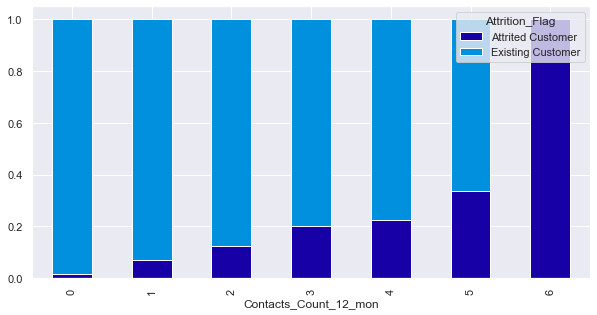

In [50]:
stacked_plot(Bank["Contacts_Count_12_mon"])

- Although this is a continous variable will treat it as categorical since it is easier to visualize. 

- There are no exsisting customers with 6 contacts, only attrited customers. 

- The more the contacts the more likely a customer may attire 

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

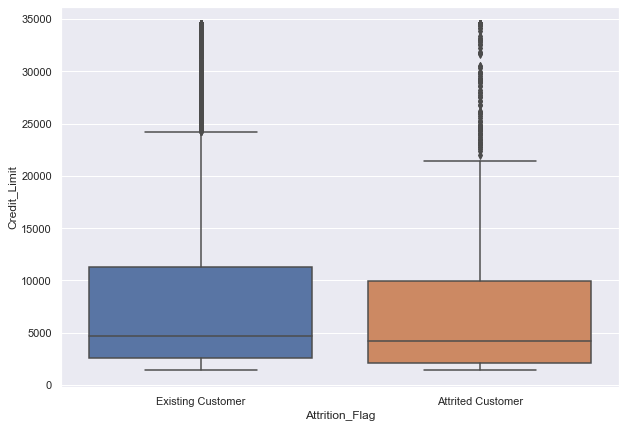

In [51]:
#Credit_Limit

sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=Bank, orient="vertical")

- Fairly similar just that attited customers have a smaller 75th and 50th percentile range 

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

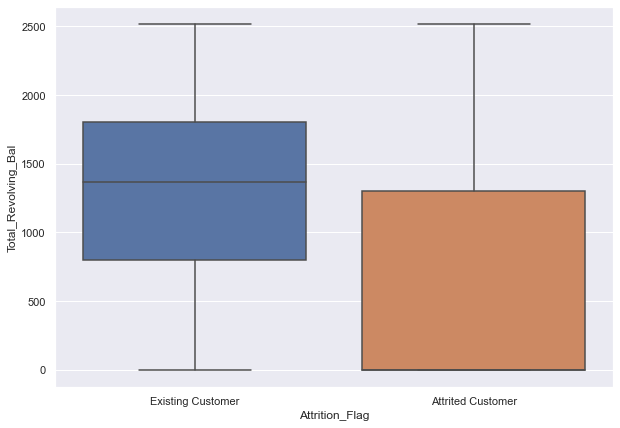

In [52]:
#Total_Revolving_Bal

sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=Bank, orient="vertical")

- 75 % of all attitred customers lie between 0 and 1300. Bank should heavily focus on these customers.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

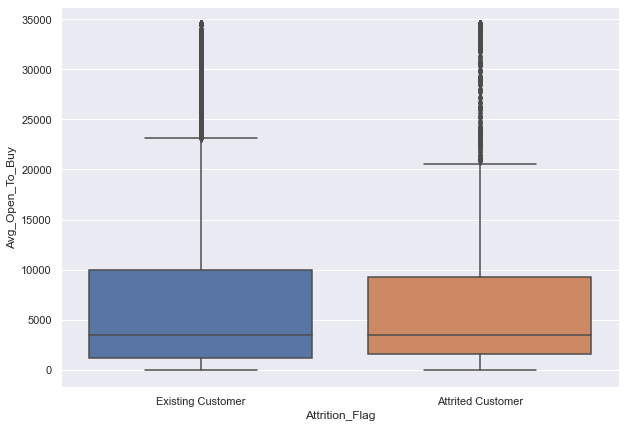

In [54]:
#Avg_Open_To_Buy

sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy", data=Bank, orient="vertical")

- No major difference; attrited customeres have a bit lower 75th percentile range 

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

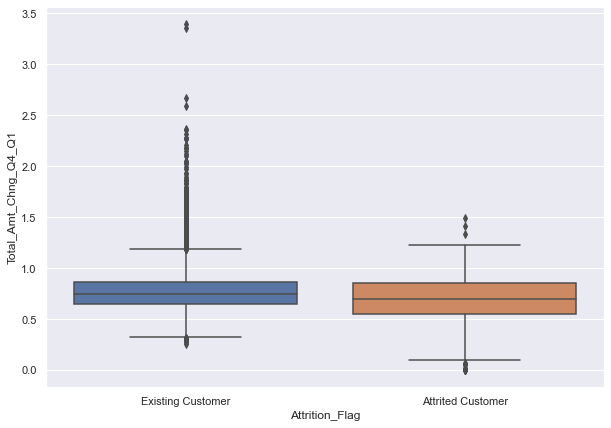

In [55]:
#Total_Amt_Chng_Q4_Q1

sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=Bank, orient="vertical")

- There are no attrited customers with 1.55 or higher 

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

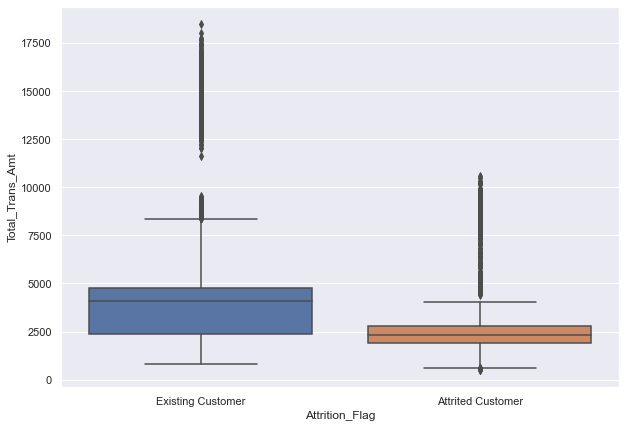

In [56]:
#Total_Trans_Amt


sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=Bank, orient="vertical")

- No attrited customers with 11250 or higher


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

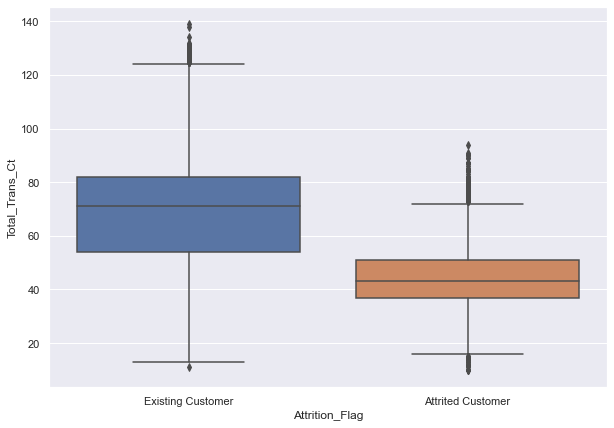

In [57]:
#Total_Trans_Ct

sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=Bank, orient="vertical")

- Interquatile range of attrited customers ~ 38-50; Bank should focus on these clients

- No attritied customers over 100. 

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

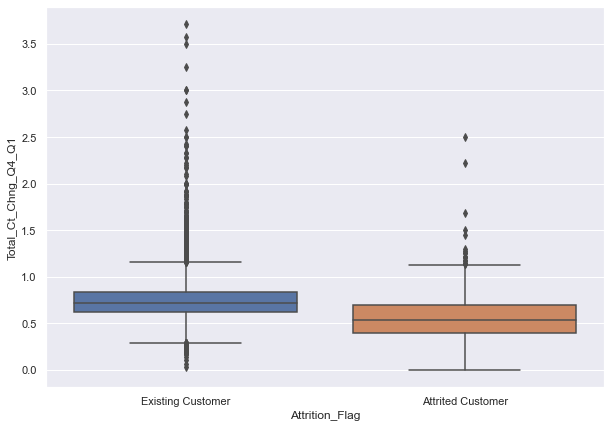

In [58]:
#Total_Ct_Chng_Q4_Q1


sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=Bank, orient="vertical")

- Fairly similary, onlyifference in outliers. No Attrited customers over 2.55 

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

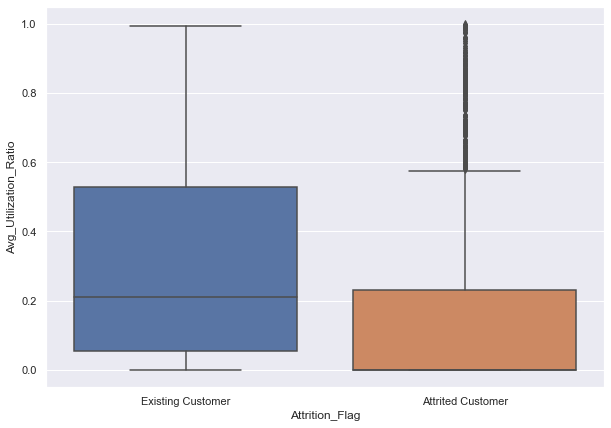

In [59]:
#Avg_Utilization_Ratio


sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=Bank, orient="vertical")

75th percentile of attrited customers are about less than 0.2 

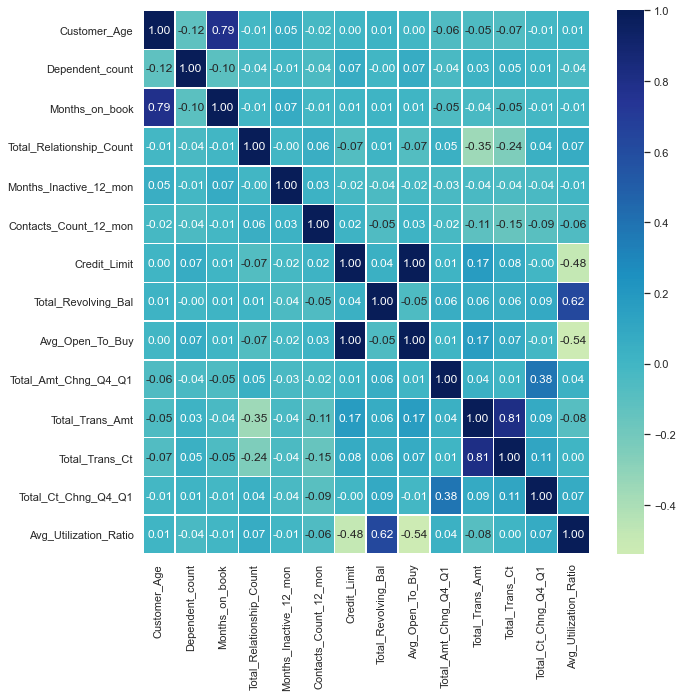

In [60]:
#heatmap 

sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    Bank.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=True,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

- Months_on_Books and Customer_Age have a high correlation, will drop Months on Books since there was a spike in the data, which might be because of an influx of clients at some point. 

- Total Transaction Count and Total Transaction Amount have a high correlation. This is expected; will drop Total_Trans_Amount. 

- Avg_Open_To_Buy and Credit_Limit have a correlation of 1. Does not make sense to include both; will drop Avg_Open_To_Buy. 

## Model Building - Approach
1. Partition the data into train and test set.
2. Treat missing values using KNNImputer
3. Built different classifiers using K-Fold cross validation, pipelines and StandardScaler.
4. Hyperparameter tuning the model which gives the best cross validation score 
6. Build the model using optimal hyperparameters and test the performance on the test set.

## Data Preparation

In [61]:
#drop Months_on_book, Avg_Open_To_Buy, and Total_Trans_Ct

Bank.drop(
    columns=[
        "Months_on_book",
        "Avg_Open_To_Buy",
        "Total_Trans_Ct",
    ],
    inplace=True,
)

In [62]:
#Encoding Variables 

Attrition_Flag = {'Existing Customer':0, 'Attrited Customer':1}
Bank['Attrition_Flag']=Bank['Attrition_Flag'].map(Attrition_Flag)

Gender = {'F':0, 'M':1}
Bank['Gender']=Bank['Gender'].map(Gender)

Education_Level = {'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Doctorate':5}
Bank['Education_Level']=Bank['Education_Level'].map(Education_Level)

Marital_Status = {'Married':1,'Single':2}
Bank['Marital_Status']=Bank['Marital_Status'].map(Marital_Status)

Income_Category = {'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
Bank['Income_Category']=Bank['Income_Category'].map(Income_Category)

Card_Category = {'Blue':1,'Silver':2,'Gold':3,'Platinum':4}
Bank['Card_Category']=Bank['Card_Category'].map(Card_Category)

In [63]:
# Separating target variable and other variables

X = Bank.drop(columns="Attrition_Flag")
Y = Bank["Attrition_Flag"]

In [64]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [65]:
imputer = KNNImputer(n_neighbors=5)


In [66]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [67]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio     

* All missing values have been treated.
* Let's inverse map the encoded values.

In [68]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [69]:
Attrition_Flag = {'Existing Customer':0, 'Attrited Customer':1}
Bank['Attrition_Flag']=Bank['Attrition_Flag'].map(Attrition_Flag)

Gender = {'F':0, 'M':1}
Bank['Gender']=Bank['Gender'].map(Gender)

Education_Level = {'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Doctorate':5}
Bank['Education_Level']=Bank['Education_Level'].map(Education_Level)

Marital_Status = {'Married':1,'Single':2}
Bank['Marital_Status']=Bank['Marital_Status'].map(Marital_Status)

Income_Category = {'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
Bank['Income_Category']=Bank['Income_Category'].map(Income_Category)

Card_Category = {'Blue':1,'Silver':2,'Gold':3,'Platinum':4}
Bank['Card_Category']=Bank['Card_Category'].map(Card_Category)

In [70]:
#inverse_mapping(Attrition_Flag,'Attrition_Flag')

inverse_mapping(Gender,'Gender')

inverse_mapping(Education_Level,'Education_Level')

inverse_mapping(Marital_Status,'Marital_Status')

inverse_mapping(Income_Category,'Income_Category')

inverse_mapping(Card_Category,'Card_Category')

In [71]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate       2377
High School    1776
College        1580
Uneducated     1043
Doctorate       312
Name: Education_Level, dtype: int64
******************************
Married    3828
Single     3260
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2635
$40K - $60K       1511
$80K - $120K      1224
$60K - $80K       1203
$120K +            515
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [72]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate       2377
High School    1776
College        1580
Uneducated     1043
Doctorate       312
Name: Education_Level, dtype: int64
******************************
Married    3828
Single     3260
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2635
$40K - $60K       1511
$80K - $120K      1224
$60K - $80K       1203
$120K +            515
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [73]:
# Encoding Categorical Variables 

Inverse mapping returned original labels and no NaN values

In [74]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 24) (3039, 24)


## Building the model


### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will attirite and the customer doesn't leave - Loss of resources & time
2. Predicting a customer will not attirite the product leaves - Loss of resources

#### Which case is more important? 
* Predicting that customer will a leave will let the bank focus on the customer that are in risk of leaving. This will they can decrease their churn rate. 

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives. 

In [75]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 43.02148543164077
RF: 68.82950768992966
GBM: 75.59084937012135
ADB: 73.39825334260762
XGB: 82.17752531107504
DTREE: 75.1537985933998


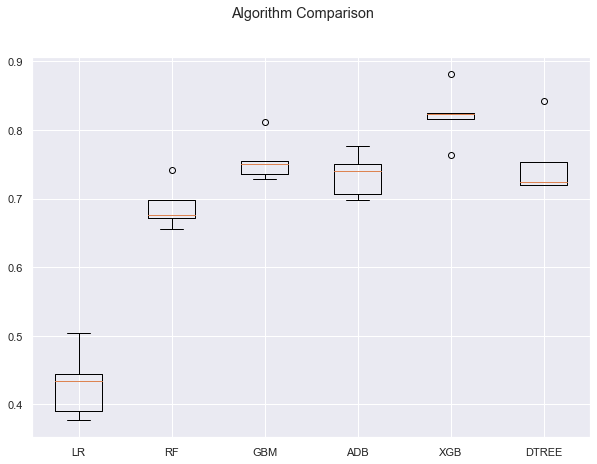

In [76]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- XGBoost gives the highest followed by similar scores in GBM, AdaBoost, and Decision Tree 

- Logisitical regression is the only model not showing a outlier 



## Create Functions to get Metric Scores and Confusion Matrix Plots


In [77]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [78]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## AdaBoost 

## GridSearchCV

In [79]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 90} 
Score: 0.827934925419275
CPU times: user 8min 44s, sys: 7.08 s, total: 8min 51s
Wall time: 9min 24s


In [80]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9827878103837472
Accuracy on test set :  0.9585389930898321
Recall on training set :  0.9341527655838455
Recall on test set :  0.8647540983606558
Precision on training set :  0.9576957695769577
Precision on test set :  0.8755186721991701


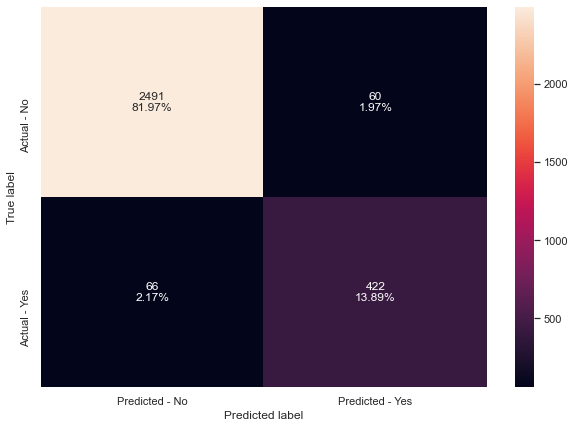

In [81]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

### RandomizedSearchCV

In [82]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.827934925419275:
CPU times: user 3min, sys: 2.23 s, total: 3min 2s
Wall time: 3min 6s


In [112]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=2),
        n_estimators=90,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=2),
                                    learning_rate=1, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.9794018058690744
Accuracy on test set :  0.9621586048042119
Recall on training set :  0.9218612818261633
Recall on test set :  0.8709016393442623
Precision on training set :  0.948509485094851
Precision on test set :  0.8909853249475891


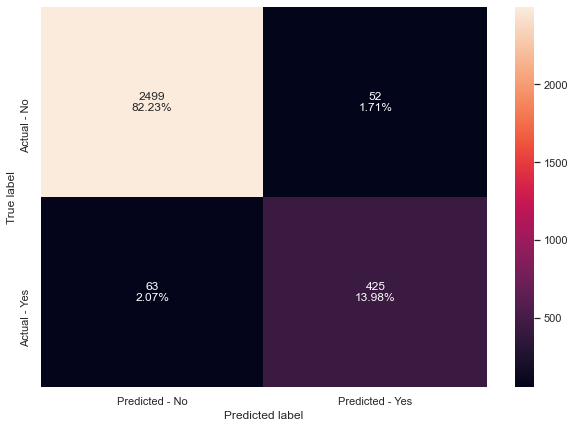

In [113]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

## XGBoost 

### GridSearchCV


In [85]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.9} with CV score=0.9429206275600895:
CPU times: user 9h 11min 39s, sys: 9min 38s, total: 9h 21min 17s
Wall time: 2h 47min 24s


In [110]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=150,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9269187358916479
Accuracy on test set :  0.9072063178677197
Recall on training set :  0.9859525899912204
Recall on test set :  0.9405737704918032
Precision on training set :  0.691076923076923
Precision on test set :  0.6446629213483146


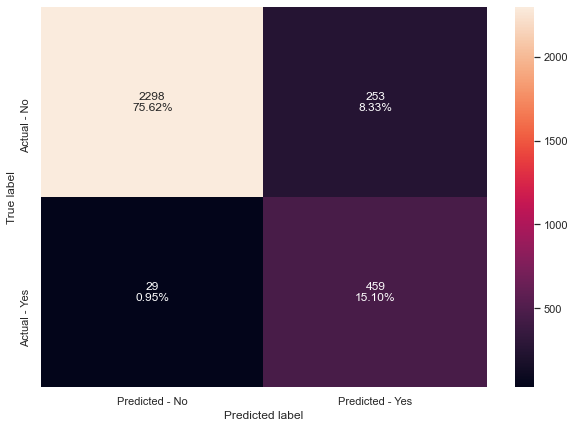

In [111]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

## XGBoost

In [88]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=2,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 0, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 0} with CV score=0.9411894273127753:
CPU times: user 15min 26s, sys: 11.8 s, total: 15min 37s
Wall time: 4min 25s


In [101]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=2,
                n_estimators=100,
                scale_pos_weight=10,
                gamma=5,
                subsample=1,
                learning_rate= 0.05,
                eval_metric='logloss', max_depth = 2, reg_lambda = 0
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=2,
                               reg_alpha=0, reg_lambda=0, scale_pos_weight=10,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8336625282167043
Accuracy on test set :  0.830536360644949
Recall on training set :  0.9648814749780509
Recall on test set :  0.9590163934426229
Precision on training set :  0.49106344950848974
Precision on test set :  0.48598130841121495


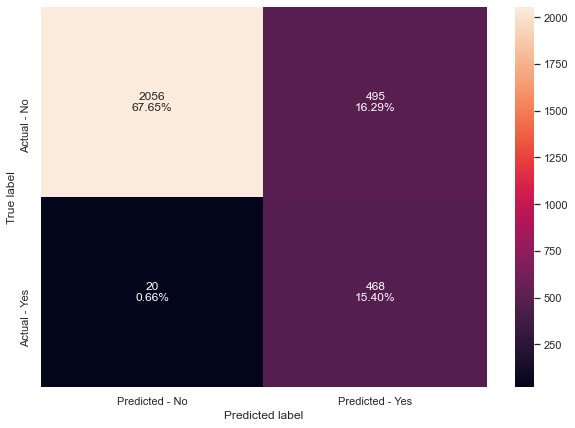

In [102]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

# Decision tree

## GridSearchCV

In [91]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=2))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 15} 
Score: 0.7647499806785686
CPU times: user 8 s, sys: 207 ms, total: 8.21 s
Wall time: 8.41 s


In [103]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=2, criterion='gini', max_depth=None, min_samples_split=15),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_split=15, random_state=2))])

Accuracy on training set :  0.9758747178329571
Accuracy on test set :  0.9355051003619612
Recall on training set :  0.8990342405618964
Recall on test set :  0.7479508196721312
Precision on training set :  0.9481481481481482
Precision on test set :  0.8333333333333334


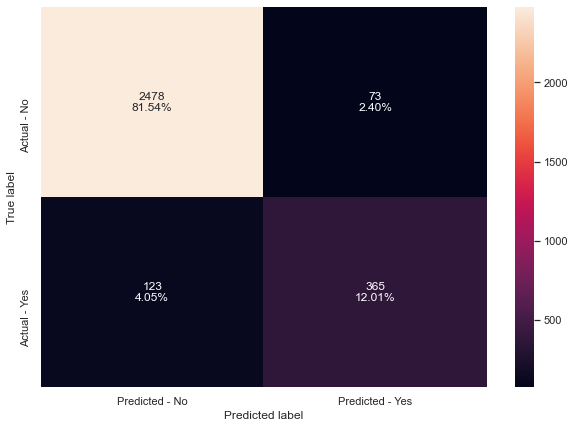

In [104]:
#Calculating different metrics
get_metrics_score(dtree_tuned1)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

## Randomized Search CV

In [94]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=2))

# Parameter grid to pass in GridSearchCV
param_grid = {
    
     "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_split': 10, 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__criterion': 'entropy'} with CV score=0.7638457376922482:
CPU times: user 4.23 s, sys: 108 ms, total: 4.34 s
Wall time: 4.52 s


In [105]:
# Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=2, criterion='entropy', max_depth=None, min_samples_split=10),
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy',
                                        min_samples_split=10,
                                        random_state=2))])

Accuracy on training set :  0.9825056433408578
Accuracy on test set :  0.9348469891411648
Recall on training set :  0.935908691834943
Recall on test set :  0.8073770491803278
Precision on training set :  0.954341987466428
Precision on test set :  0.7911646586345381


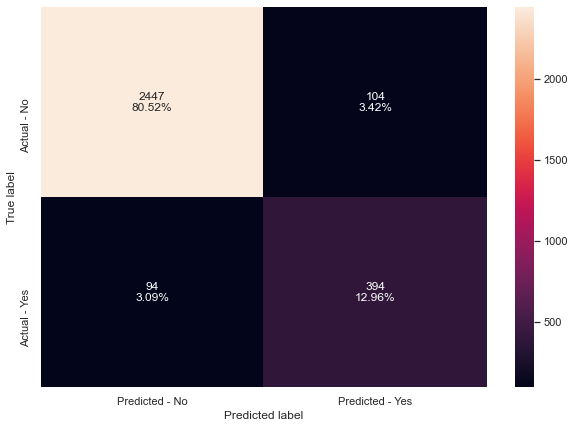

In [106]:
# Calculating different metrics
get_metrics_score(dtree_tuned2)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

# Comparing All Models 

In [108]:
# defining list for 3 models
models = [abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2, dtree_tuned1, dtree_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [109]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "AdaBoost with GridSearchCV",
            "AdaBoost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
3,XGBoost with RandomizedSearchCV,0.833663,0.830536,0.964881,0.959016,0.491063,0.485981
2,XGBoost with GridSearchCV,0.915209,0.901283,0.980685,0.938525,0.658608,0.629121
1,AdaBoost with RandomizedSearchCV,0.975593,0.963804,0.910448,0.877049,0.935921,0.895397
0,AdaBoost with GridSearchCV,0.982788,0.958539,0.934153,0.864754,0.957696,0.875519
5,Decision Tree with RandomizedSearchCV,0.982506,0.934847,0.935909,0.807377,0.954342,0.791165
4,Decision Tree with GridSearchCV,0.975875,0.935505,0.899034,0.747951,0.948148,0.833333


- Both XGBoost Models performed the best 

- The XGBoost with Randomized Search CV is in first place with a high recall score in both the train and test Recalls



## XGBoost Random SearchCV Feature Importance

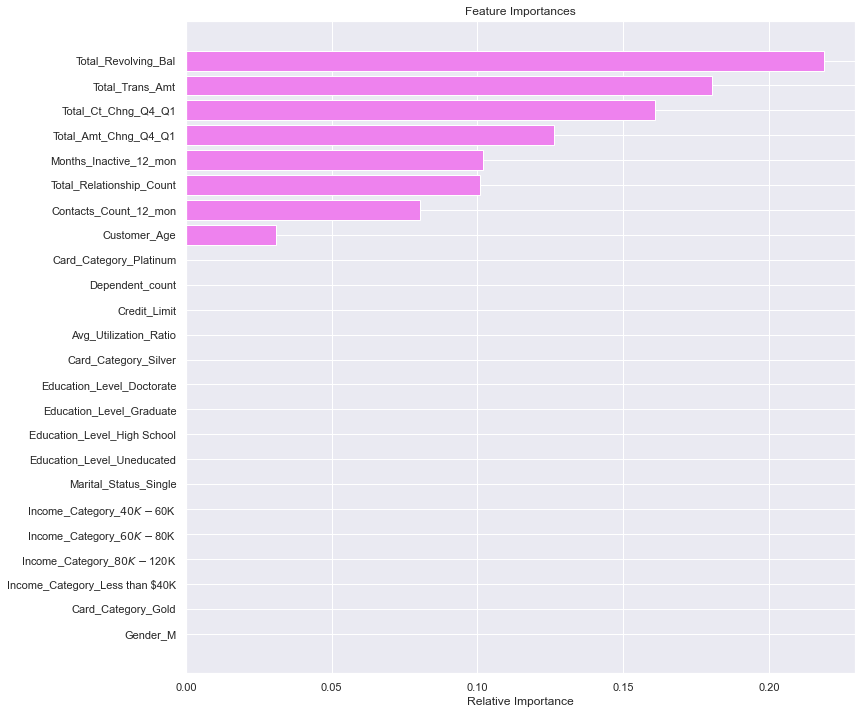

In [114]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## XGBoost Grid SearchCV Feature Importance


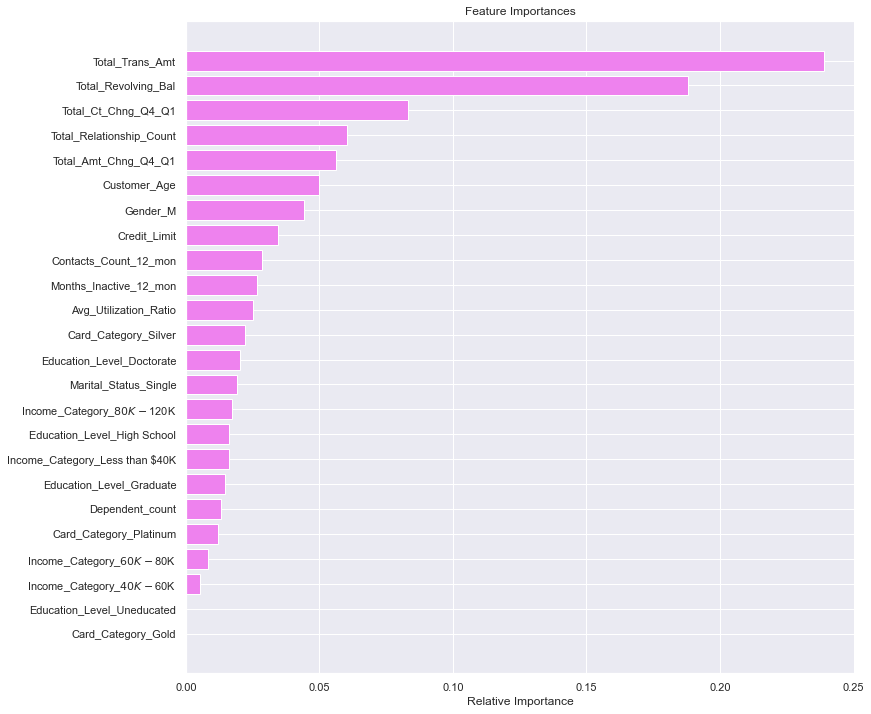

In [115]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- the most important feature in XGBoost Randomized CV is Total Revolving Balance 

- the most important feature in XGBoost GridSearch CV is Total Tranaction Amount

- XGBoost Randomized CV has 8 features with a relative importance of greater than 0, while XGBoost GridSearch CV hass 22. 

# Business Recommendations and Insights 

- Bank should focus on keeping existing clients; clients that tend to leave can be predicted based on their spending habits; not their income. 

- Clients with high transaction amount and total revolving balance are likely to stay. 

- The more a client is contacted the more likely to leave. Although sometimes banks may need to contact clients in certain situtations, the data shows that the more a client is contacted in a 12 month period the more likely they will leave. 

- The bank should focus on Total Relationship Count, since it is shown that the more accounts a client has the less likely they will leave. This can be done in terms of offers, etc. 

- Bank can predict which clients are likely to leave based on their behavior such as total transaction amount, total revolving balance, total count change from Q4 to Q1 and can minimize the likelihood of them leaving be trying to improve om metrics the bank have control or influence over, such as number of contacts (avoid overcontacting the client too much) and total relationship count (the more accounts a client has the less likely they will leave). 
